In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# Data Cleaning and Preparation:
# load data set
cardio = pd.read_csv(r"C:\Users\itsej\Downloads\ASSIGNMENTS EXCELR\EDA1\Cardiotocographic.csv")
cardio

LB        AC        FM        UC        DL   DS   DP  ASTV  \
0     120.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  73.0   
1     132.000000  0.006380  0.000000  0.006380  0.003190  0.0  0.0  17.0   
2     133.000000  0.003322  0.000000  0.008306  0.003322  0.0  0.0  16.0   
3     134.000000  0.002561  0.000000  0.007742  0.002561  0.0  0.0  16.0   
4     131.948232  0.006515  0.000000  0.008143  0.000000  0.0  0.0  16.0   
...          ...       ...       ...       ...       ...  ...  ...   ...   
2121  140.000000  0.000000  0.961268  0.007426  0.000000  0.0  0.0  79.0   
2122  140.000000  0.000775  0.000000  0.006979  0.000000  0.0  0.0  78.0   
2123  140.000000  0.000980  0.000000  0.006863  0.000000  0.0  0.0  79.0   
2124  140.000000  0.000679  0.000000  0.006110  0.000000  0.0  0.0  78.0   
2125  142.000000  0.001616 -0.000188  0.008078  0.000000  0.0  0.0  74.0   

      MSTV       ALTV  MLTV  Width  Tendency       NSP  
0      0.5  43.000000   2.4   64.0  0.999926  2.000000  
1      2.1   0.000000  10.4  130.0  0.000000  1.000000  
2      2.1   0.000000  13.4  130.0  0.000000  1.000000  
3      2.4   0.000000  23.0  117.0  1.000000  1.000000  
4      2.4   0.000000  19.9  117.0  1.000000  1.000000  
...    ...        ...   ...    ...       ...       ...  
2121   0.2  25.000000   7.2   40.0  0.000000  2.000000  
2122   0.4  22.000000   7.1   66.0  1.000000  2.000000  
2123   0.4  20.000000   6.1   67.0  1.000000  1.990464  
2124   0.4  27.000000   7.0   66.0  1.000000  2.000000  
2125   0.4  35.857183   5.0   42.0  0.000000  1.000000  

[2126 rows x 14 columns]

In [3]:
# Handle missing values appropriately (e.g., imputation, deletion).
# Identify missing values
missing_values = cardio.isnull().sum()
print("Missing values:")
print(missing_values)

Missing values:
LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [4]:
# Decide on a strategy (e.g., imputation)
# For example, impute missing values in a numerical column with the mean
mean_value = cardio["FM"].mean()
cardio["FM"].fillna(mean_value, inplace=True)



In [43]:
numerical_columns = cardio.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency', 'NSP'],
      dtype='object')

In [6]:
means = {}
for column in numerical_columns:
    mean = cardio[column].mean()
    means[column] = {'Mean': mean}

In [7]:
for column, m in means.items():
    print(f"Mean Value for column '{column}':",m['Mean'])
    print()

Mean Value for column 'LB': 133.3435983550352

Mean Value for column 'AC': 0.0032189782438000465

Mean Value for column 'FM': 0.009894484174097834

Mean Value for column 'UC': 0.004390615424744109

Mean Value for column 'DL': 0.0018953447635069313

Mean Value for column 'DS': 2.5089835057102827e-06

Mean Value for column 'DP': 0.00017515121174634704

Mean Value for column 'ASTV': 46.99598415495999

Mean Value for column 'MSTV': 1.3643783514792533

Mean Value for column 'ALTV': 10.285964066432834

Mean Value for column 'MLTV': 8.28488742706321

Mean Value for column 'Width': 70.42926049411918

Mean Value for column 'Tendency': 0.3163714038702473

Mean Value for column 'NSP': 1.304507175110962



In [8]:
# Implement the chosen strategy
# For example, delete rows with missing values
cardio.dropna(inplace=True)

In [9]:
# Verify that missing values have been handled
missing_values_after_handling = cardio.isnull().sum()
print("Missing values after handling:")
print(missing_values_after_handling)

Missing values after handling:
LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64


In [10]:
# Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).
# Inspect data types
print("Data types before correction:")
print(cardio.info())

Data types before correction:
<class 'pandas.core.frame.DataFrame'>
Index: 2105 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2105 non-null   float64
 2   FM        2105 non-null   float64
 3   UC        2105 non-null   float64
 4   DL        2105 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2105 non-null   float64
 8   MSTV      2105 non-null   float64
 9   ALTV      2105 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 246.7 KB
None


In [11]:
# Identify inconsistencies
# For example, if 'numerical_column' contains numerical values stored as strings
# and is of dtype 'object'
for column in numerical_columns:
    if cardio[column].dtype == 'object':
# Convert data type to int or float
        cardio[column] = cardio[column].astype(int)  # or float


In [12]:
# Verify data types after correction
print("\nData types after correction:")
print(cardio.info())


Data types after correction:
<class 'pandas.core.frame.DataFrame'>
Index: 2105 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2105 non-null   float64
 2   FM        2105 non-null   float64
 3   UC        2105 non-null   float64
 4   DL        2105 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2105 non-null   float64
 8   MSTV      2105 non-null   float64
 9   ALTV      2105 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 246.7 KB
None


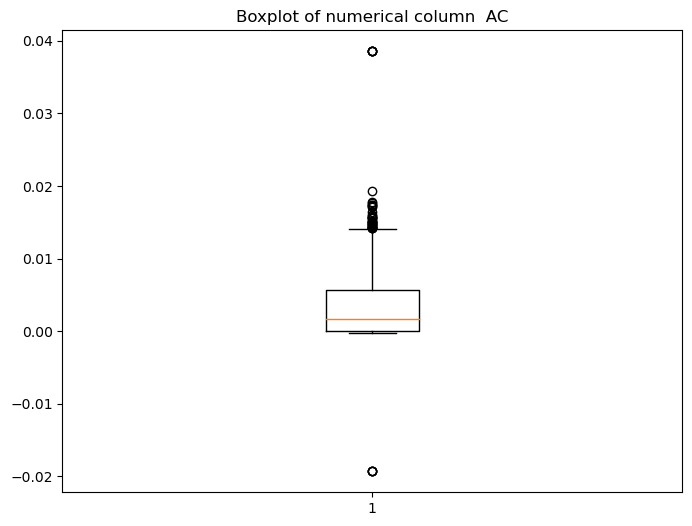

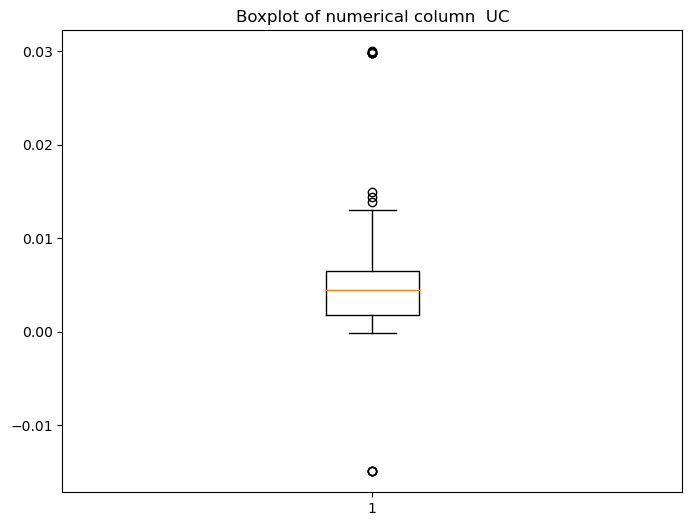

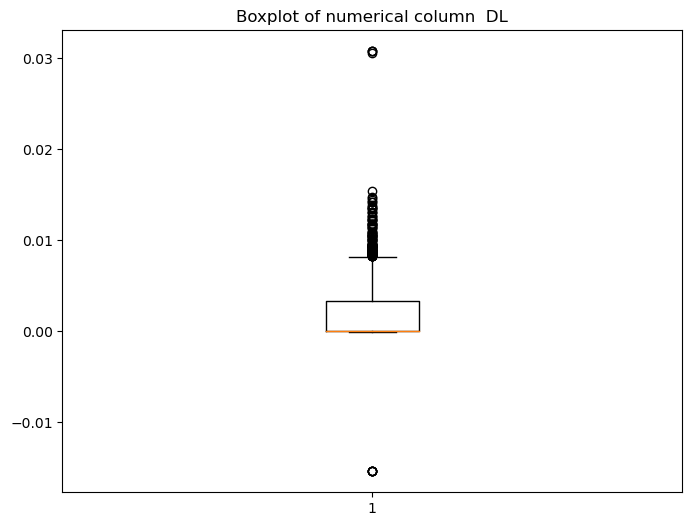

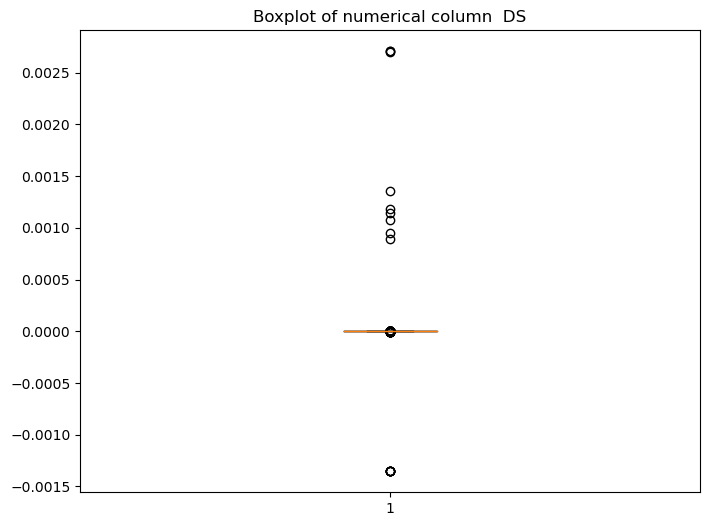

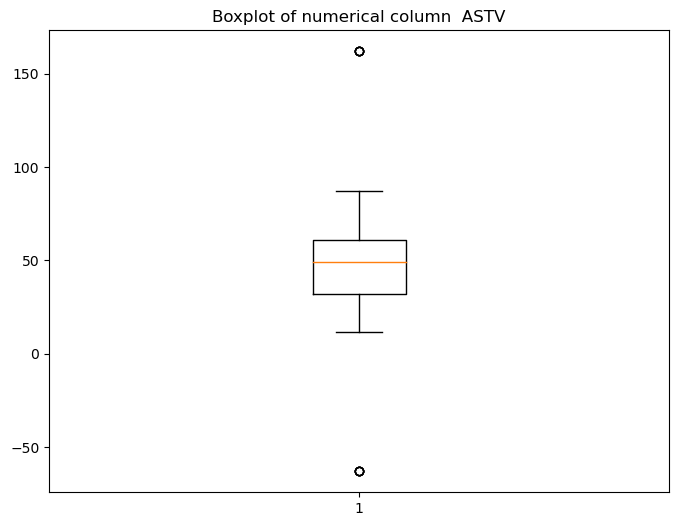

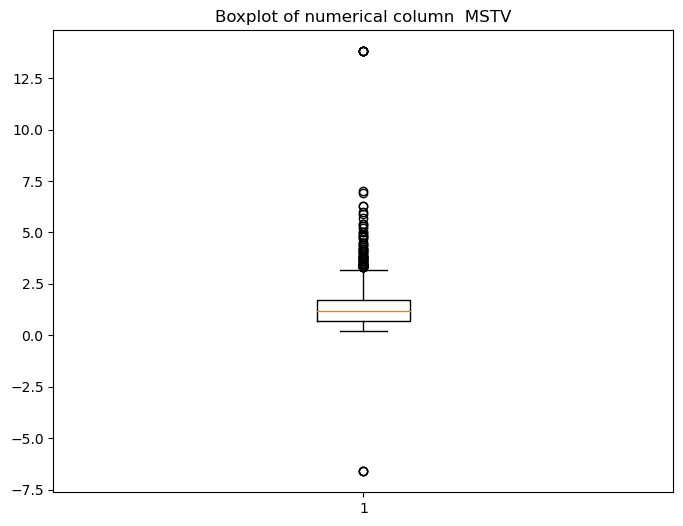

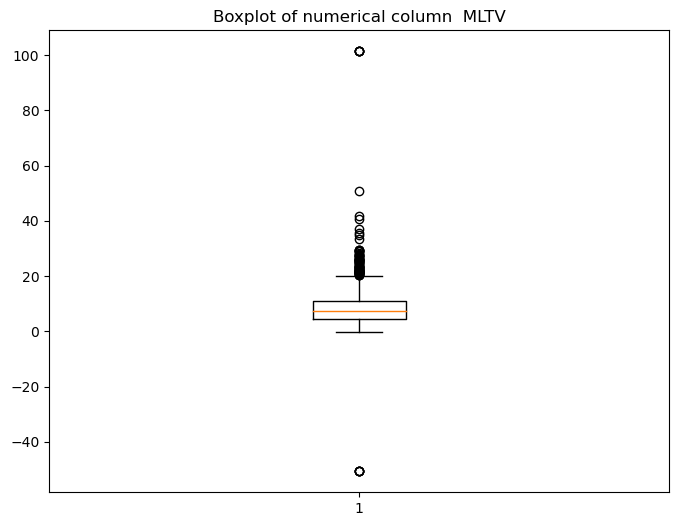

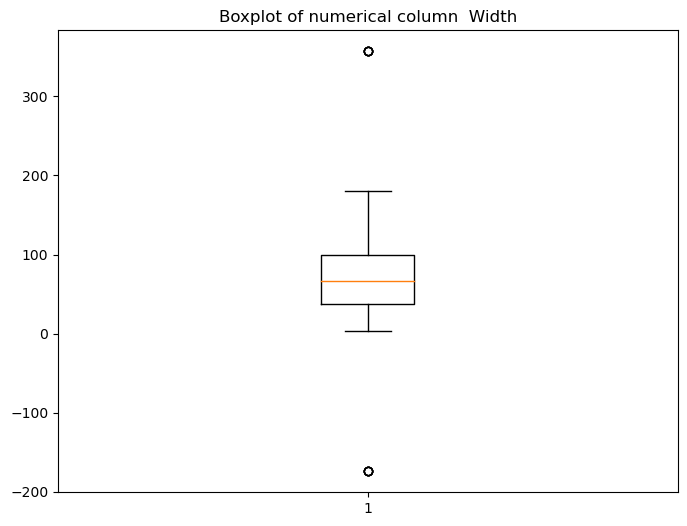

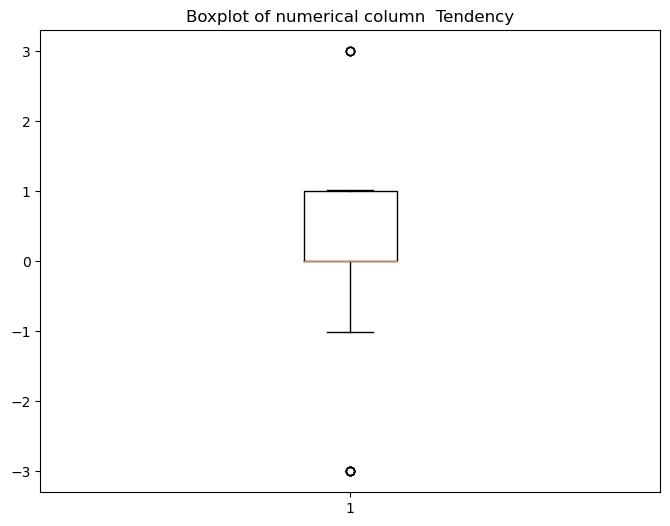

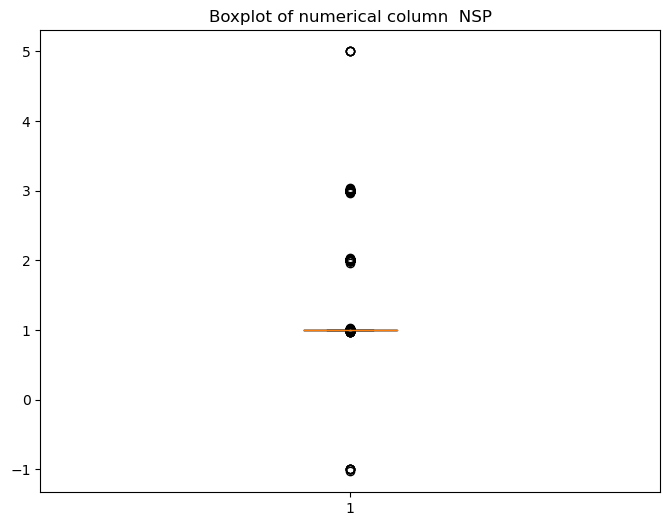

In [13]:
# Detect and treat outliers if necessary.
# Visualize the data
# For example, plot a boxplot for a numerical variable 'numerical_column'
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(cardio[column])
    plt.title('Boxplot of numerical column  '+ column)
    plt.show()


In [14]:
# Identify outliers using z-score
for column in numerical_columns:
    z_scores = np.abs((cardio[column] - cardio[column].mean()) / cardio[column].std())
    outliers = cardio[z_scores > 3]  # Threshold for outliers
outliers

LB        AC        FM        UC        DL   DS        DP       ASTV  \
6     134.0  0.001403  0.000000  0.012623  0.008415  0.0  0.002805  29.000000   
60    146.0  0.005083 -0.002304  0.005083  0.000000  0.0  0.000000  39.000000   
252   130.0  0.001668  0.008340  0.003336  0.000000  0.0  0.000000  57.000000   
381   129.0  0.009174  0.035029  0.002502  0.000000  0.0  0.000000  41.000000   
382   131.0  0.012195  0.054201  0.002710  0.000000  0.0  0.000000  37.000000   
763   129.0  0.002502  0.000834  0.000000  0.000000  0.0  0.000000  59.000000   
1073  136.0  0.005848  0.000000  0.005848  0.002924  0.0  0.000000  35.701844   
1383  121.0  0.000000  0.000000  0.007937  0.007937  0.0  0.000000  28.000000   
1496  132.0  0.006124 -0.000767  0.009624 -0.015385  0.0  0.000000  32.000000   
1646  130.0  0.008040  0.001005  0.006030  0.005025  0.0  0.000000  52.000000   

      MSTV  ALTV       MLTV       Width  Tendency       NSP  
6      6.3   0.0   0.000000  150.000000  0.000000 -1.025988  
60     0.9  18.0   5.200000   44.375735  0.000000  5.000000  
252    0.6  26.0  14.300000   91.091718  0.981338  5.000000  
381    1.1   0.0 -50.700000  135.000000  0.000000 -1.000000  
382    1.4   0.0   3.700000  135.000000  0.000000 -1.000000  
763    0.9  21.0  19.339804  118.000000  0.000000  5.000000  
1073   1.2  12.0   5.800000   79.000000  1.000000 -1.000000  
1383   1.4   0.0   5.700000   67.000000  1.000000 -1.000000  
1496   1.2   0.0  13.500000   72.000000  1.000000  5.000000  
1646   1.7   0.0   0.300000  101.000000  0.000000 -1.000000

In [15]:
# Treat outliers (e.g., remove outliers)
remove_outlier = cardio[z_scores <= 3]  # Remove outliers based on z-score
remove_outlier

LB        AC        FM        UC        DL   DS   DP  ASTV  \
0     120.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  73.0   
1     132.000000  0.006380  0.000000  0.006380  0.003190  0.0  0.0  17.0   
2     133.000000  0.003322  0.000000  0.008306  0.003322  0.0  0.0  16.0   
3     134.000000  0.002561  0.000000  0.007742  0.002561  0.0  0.0  16.0   
4     131.948232  0.006515  0.000000  0.008143  0.000000  0.0  0.0  16.0   
...          ...       ...       ...       ...       ...  ...  ...   ...   
2121  140.000000  0.000000  0.961268  0.007426  0.000000  0.0  0.0  79.0   
2122  140.000000  0.000775  0.000000  0.006979  0.000000  0.0  0.0  78.0   
2123  140.000000  0.000980  0.000000  0.006863  0.000000  0.0  0.0  79.0   
2124  140.000000  0.000679  0.000000  0.006110  0.000000  0.0  0.0  78.0   
2125  142.000000  0.001616 -0.000188  0.008078  0.000000  0.0  0.0  74.0   

      MSTV       ALTV  MLTV  Width  Tendency       NSP  
0      0.5  43.000000   2.4   64.0  0.999926  2.000000  
1      2.1   0.000000  10.4  130.0  0.000000  1.000000  
2      2.1   0.000000  13.4  130.0  0.000000  1.000000  
3      2.4   0.000000  23.0  117.0  1.000000  1.000000  
4      2.4   0.000000  19.9  117.0  1.000000  1.000000  
...    ...        ...   ...    ...       ...       ...  
2121   0.2  25.000000   7.2   40.0  0.000000  2.000000  
2122   0.4  22.000000   7.1   66.0  1.000000  2.000000  
2123   0.4  20.000000   6.1   67.0  1.000000  1.990464  
2124   0.4  27.000000   7.0   66.0  1.000000  2.000000  
2125   0.4  35.857183   5.0   42.0  0.000000  1.000000  

[2095 rows x 14 columns]

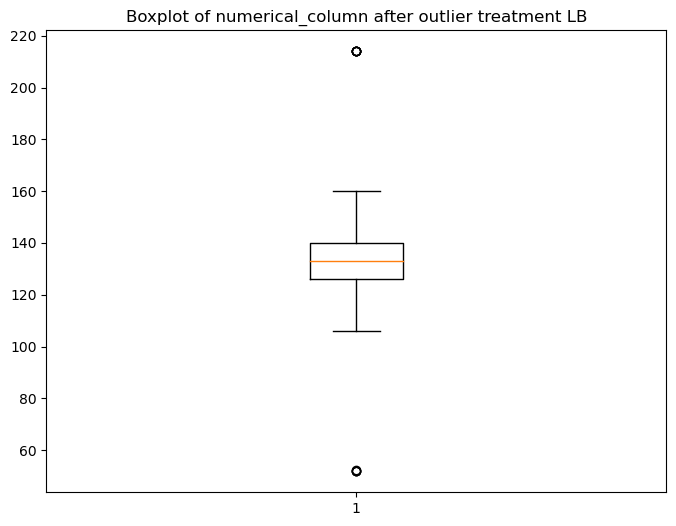

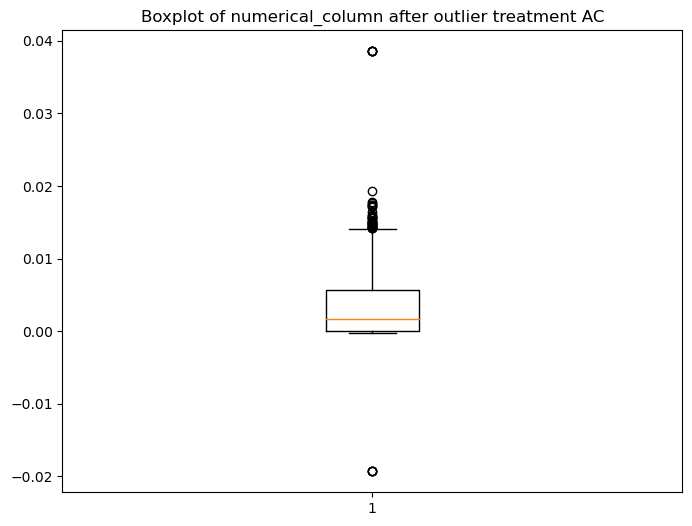

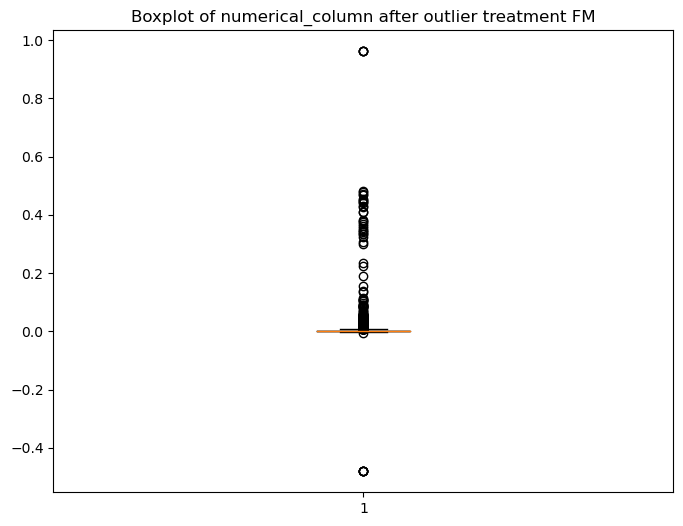

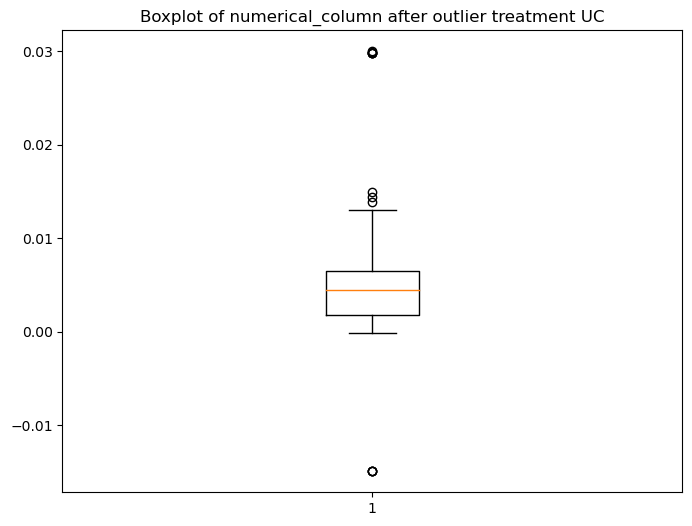

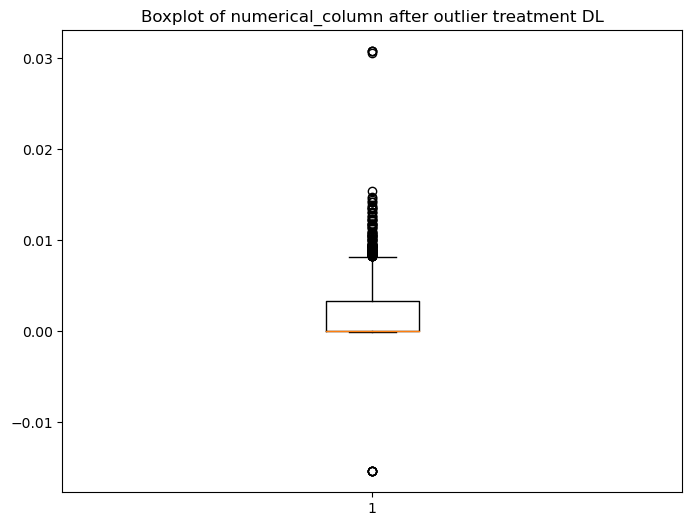

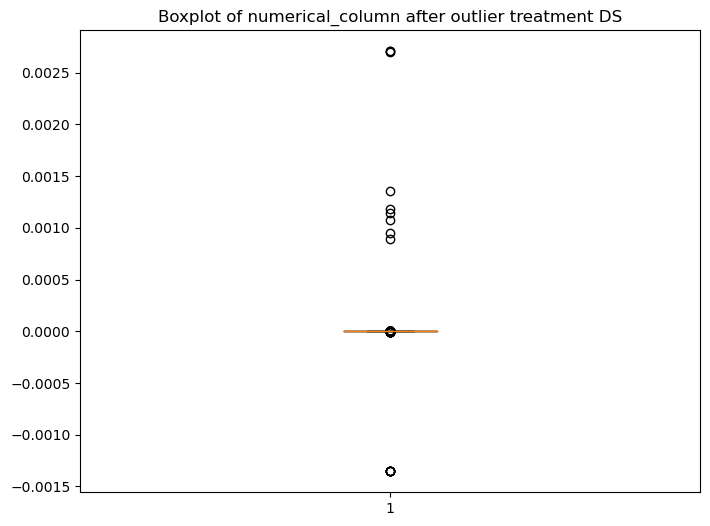

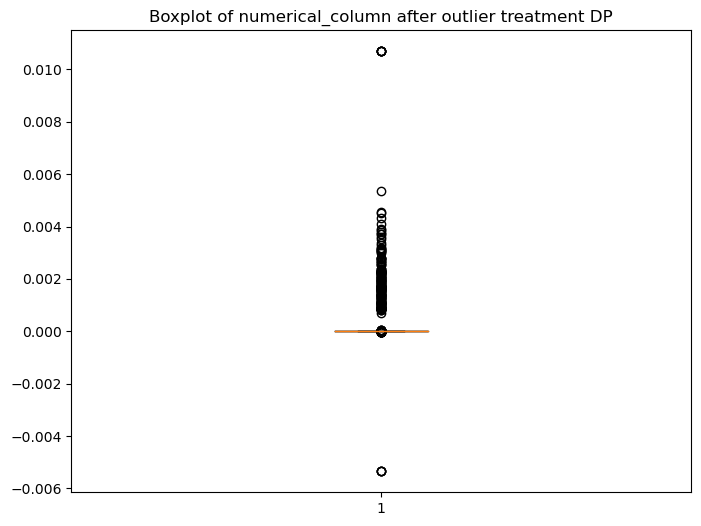

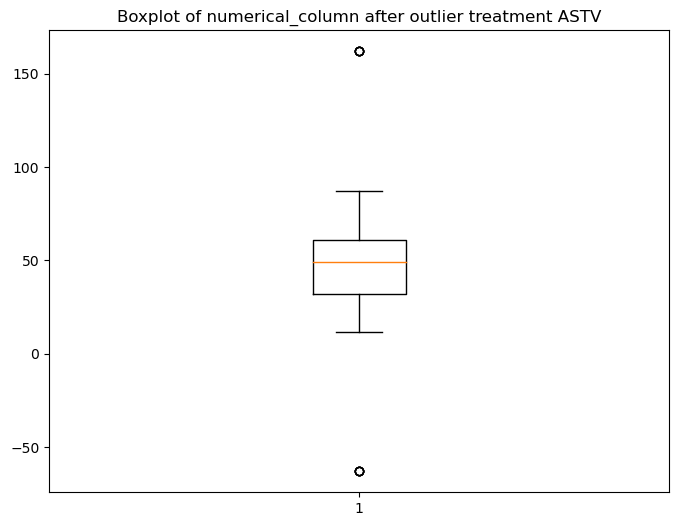

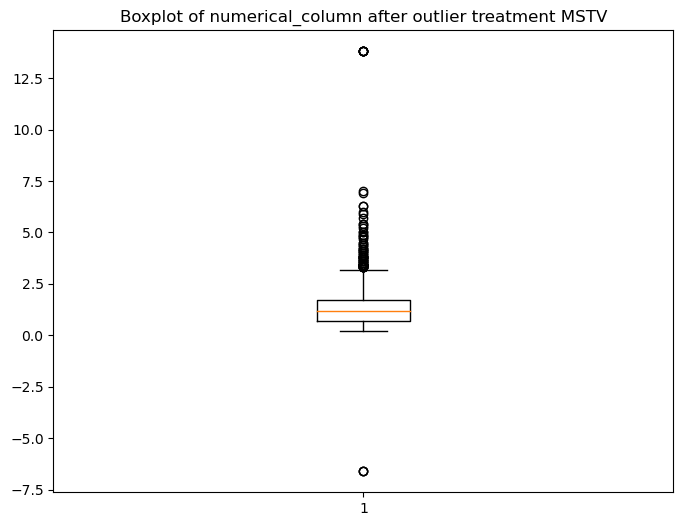

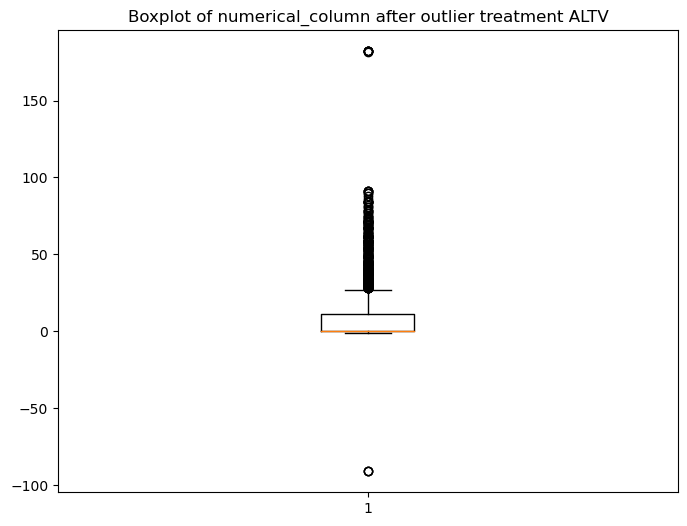

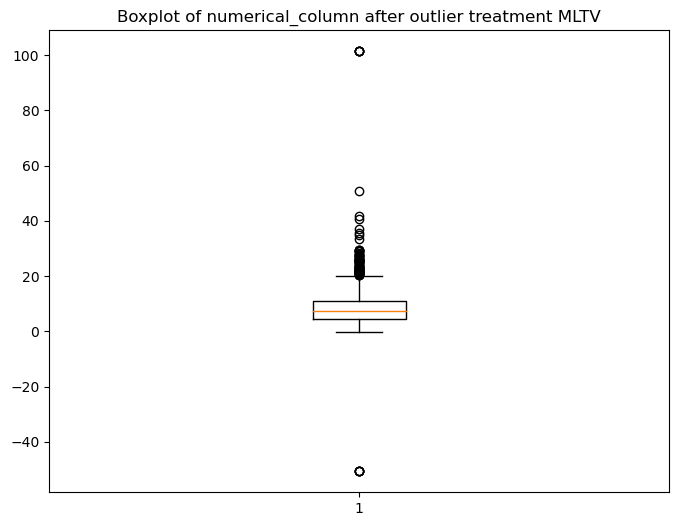

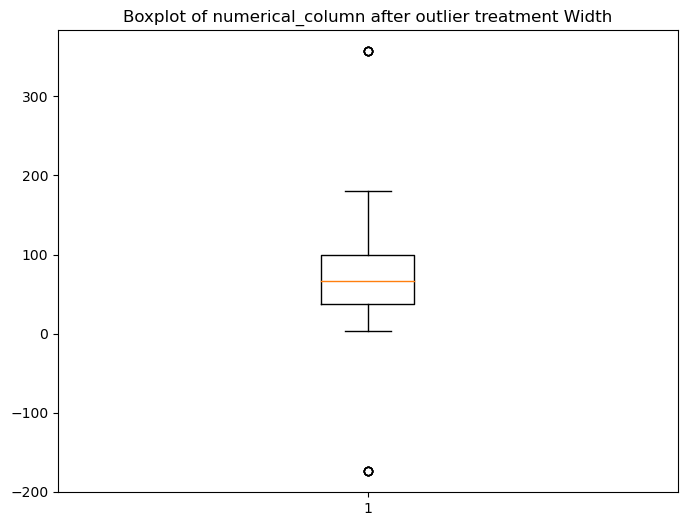

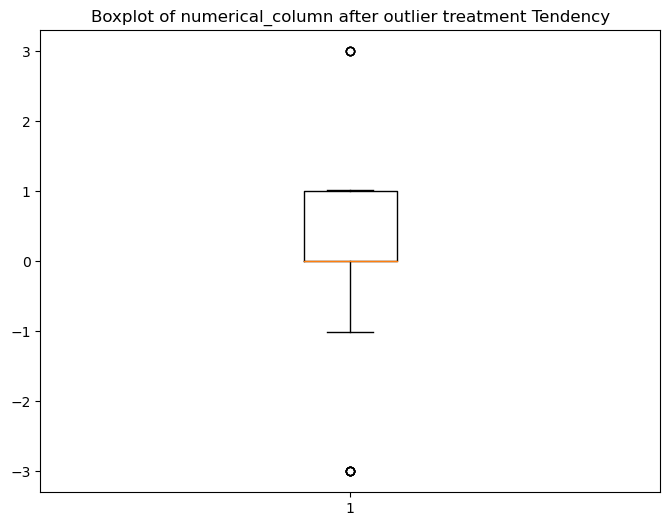

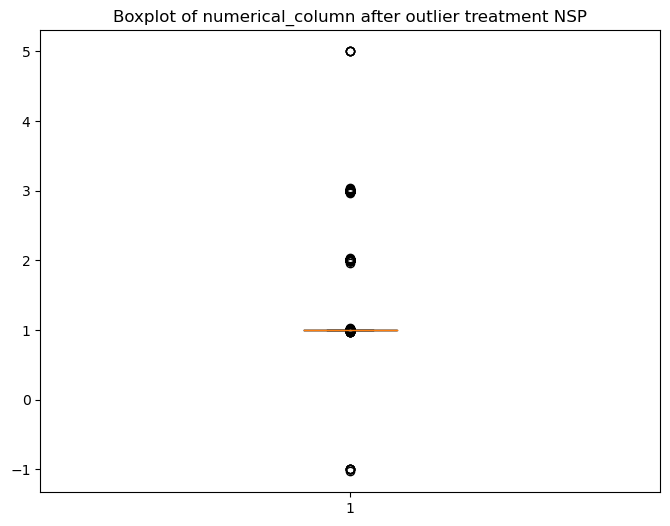

In [16]:
# Verify outlier treatment
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(cardio[column])
    plt.title('Boxplot of numerical_column after outlier treatment ' + column)
    plt.show()

In [17]:
# Statistical Summary:
# Provide a statistical summary for each variable
summary = cardio.describe()

# Display the summary
print("Statistical Summary:")
print(summary)

Statistical Summary:
                LB           AC           FM           UC           DL  \
count  2105.000000  2105.000000  2105.000000  2105.000000  2105.000000   
mean    133.343598     0.003202     0.009963     0.004388     0.001892   
std      11.270154     0.004324     0.067870     0.003350     0.003348   
min      51.842487    -0.019284    -0.480634    -0.014925    -0.015393   
25%     126.000000     0.000000     0.000000     0.001838     0.000000   
50%     133.000000     0.001631     0.000000     0.004484     0.000000   
75%     140.000000     0.005650     0.002554     0.006536     0.003289   
max     214.000000     0.038567     0.961268     0.030002     0.030769   

                DS           DP         ASTV         MSTV         ALTV  \
count  2105.000000  2105.000000  2105.000000  2105.000000  2105.000000   
mean      0.000003     0.000175    46.996929     1.361006    10.353647   
std       0.000142     0.000840    18.847737     1.173164    21.282102   
min      -0.0013

In [18]:
# Provide a statistical summary for each variable
summary = cardio.describe()

# Highlight interesting findings
print("Interesting Findings:")
print("- Mean and Median:")
print(summary.loc[['mean', '50%']])  # Display mean and median
print("- Standard Deviation:")
print(summary.loc['std'])  # Display standard deviation
print("- Interquartile Range:")
print(summary.loc['75%'] - summary.loc['25%'])  # Calculate and display IQR
print("- Min and Max Values:")
print(summary.loc[['min', 'max']])  # Display min and max values
print("- Count:")
print(summary.loc['count'])  # Display count

Interesting Findings:
- Mean and Median:
              LB        AC        FM        UC        DL        DS        DP  \
mean  133.343598  0.003202  0.009963  0.004388  0.001892  0.000003  0.000175   
50%   133.000000  0.001631  0.000000  0.004484  0.000000  0.000000  0.000000   

           ASTV      MSTV       ALTV      MLTV     Width  Tendency       NSP  
mean  46.996929  1.361006  10.353647  8.284887  70.42926  0.316371  1.304507  
50%   49.000000  1.200000   0.000000  7.400000  67.00000  0.000000  1.000000  
- Standard Deviation:
LB          11.270154
AC           0.004324
FM           0.067870
UC           0.003350
DL           0.003348
DS           0.000142
DP           0.000840
ASTV        18.847737
MSTV         1.173164
ALTV        21.282102
MLTV         7.772858
Width       42.931822
Tendency     0.645622
NSP          0.644619
Name: std, dtype: float64
- Interquartile Range:
LB          14.000000
AC           0.005650
FM           0.002554
UC           0.004698
DL           0

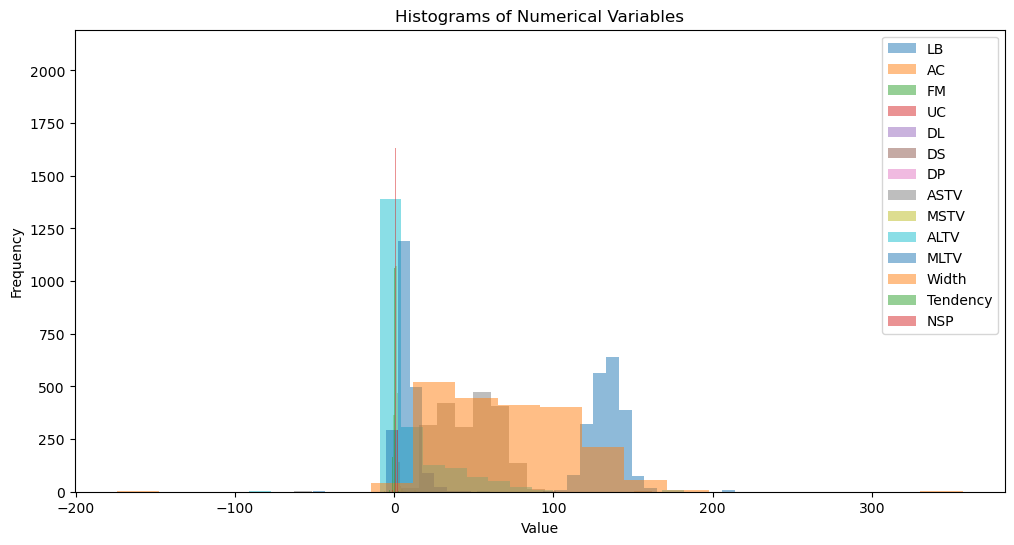

In [19]:
# Data Visualization:
# Create histograms for numerical variables
plt.figure(figsize=(12, 6))
for column in cardio.select_dtypes(include='number'):
    plt.hist(cardio[column], bins=20, alpha=0.5, label=column)
plt.title('Histograms of Numerical Variables')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

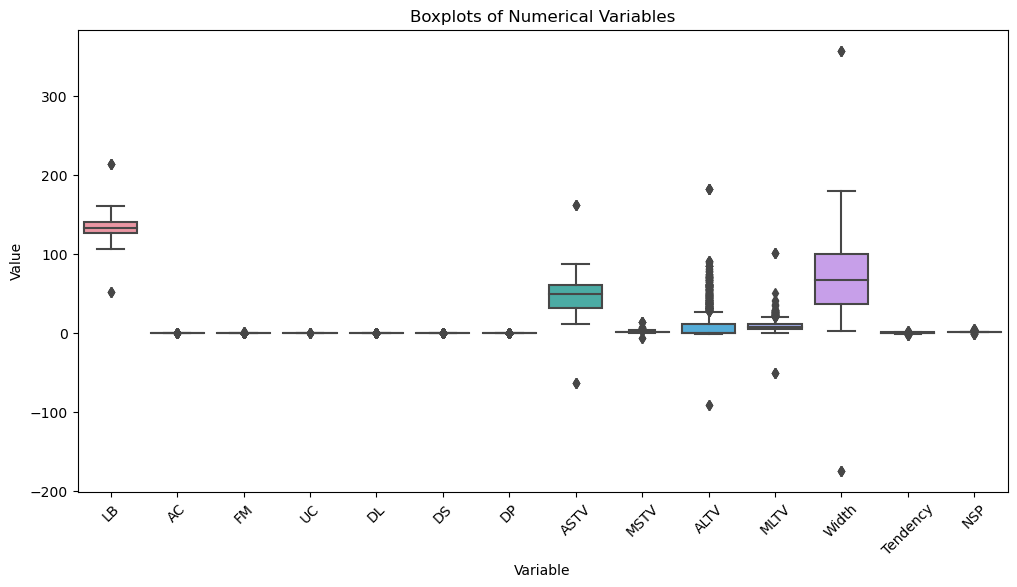

In [20]:
# Create boxplots for numerical variables
plt.figure(figsize=(12, 6))
sns.boxplot(data=cardio)
plt.title('Boxplots of Numerical Variables')
plt.xlabel('Variable')
plt.ylabel('Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [21]:
# Statistical Summary:
# Calculate measures of central tendency
central_tendency = cardio.agg(['mean', 'median'])
central_tendency

LB        AC        FM        UC        DL        DS  \
mean    133.343598  0.003202  0.009963  0.004388  0.001892  0.000003   
median  133.000000  0.001631  0.000000  0.004484  0.000000  0.000000   

              DP       ASTV      MSTV       ALTV      MLTV     Width  \
mean    0.000175  46.996929  1.361006  10.353647  8.284887  70.42926   
median  0.000000  49.000000  1.200000   0.000000  7.400000  67.00000   

        Tendency       NSP  
mean    0.316371  1.304507  
median  0.000000  1.000000

In [22]:
# Calculate measures of dispersion
dispersion = cardio.agg(['std', lambda x: x.quantile(0.75) - x.quantile(0.25)])
dispersion

LB        AC        FM        UC        DL        DS  \
std       11.270154  0.004324  0.067870  0.003350  0.003348  0.000142   
<lambda>  14.000000  0.005650  0.002554  0.004698  0.003289  0.000000   

               DP       ASTV      MSTV       ALTV      MLTV      Width  \
std       0.00084  18.847737  1.173164  21.282102  7.772858  42.931822   
<lambda>  0.00000  29.000000  1.000000  11.000000  6.300000  63.000000   

          Tendency       NSP  
std       0.645622  0.644619  
<lambda>  1.000000  0.000000

In [23]:
# Combine central tendency and dispersion into one dataframe
summary = pd.concat([central_tendency, dispersion], axis=0, keys=['Central Tendency', 'Dispersion'])

# Display the summary
print(summary)

                                   LB        AC        FM        UC        DL  \
Central Tendency mean      133.343598  0.003202  0.009963  0.004388  0.001892   
                 median    133.000000  0.001631  0.000000  0.004484  0.000000   
Dispersion       std        11.270154  0.004324  0.067870  0.003350  0.003348   
                 <lambda>   14.000000  0.005650  0.002554  0.004698  0.003289   

                                 DS        DP       ASTV      MSTV       ALTV  \
Central Tendency mean      0.000003  0.000175  46.996929  1.361006  10.353647   
                 median    0.000000  0.000000  49.000000  1.200000   0.000000   
Dispersion       std       0.000142  0.000840  18.847737  1.173164  21.282102   
                 <lambda>  0.000000  0.000000  29.000000  1.000000  11.000000   

                               MLTV      Width  Tendency       NSP  
Central Tendency mean      8.284887  70.429260  0.316371  1.304507  
                 median    7.400000  67.000000  0.

In [24]:
# Identify variables with high standard deviation or wide interquartile range
outliers_std = summary.loc['Dispersion', ('std')].nlargest(5)
outliers_iqr = summary.loc['Dispersion', ('<lambda>')].nlargest(5)
print("Variables with highest standard deviation:")
print(outliers_std)
print("\nVariables with widest interquartile range:")
print(outliers_iqr)

Variables with highest standard deviation:
Width    42.931822
ALTV     21.282102
ASTV     18.847737
LB       11.270154
MLTV      7.772858
Name: (Dispersion, std), dtype: float64

Variables with widest interquartile range:
Width    63.0
ASTV     29.0
LB       14.0
ALTV     11.0
MLTV      6.3
Name: (Dispersion, <lambda>), dtype: float64


In [25]:
# Compare mean and median to identify skewed distributions
skewed_variables = summary.loc[:, abs(summary.loc['Central Tendency', 'mean'] - summary.loc['Central Tendency', 'median']) > 0.5]
print("\nVariables with significant skewness between mean and median:")
print(skewed_variables)


Variables with significant skewness between mean and median:
                                ASTV       ALTV      MLTV      Width
Central Tendency mean      46.996929  10.353647  8.284887  70.429260
                 median    49.000000   0.000000  7.400000  67.000000
Dispersion       std       18.847737  21.282102  7.772858  42.931822
                 <lambda>  29.000000  11.000000  6.300000  63.000000


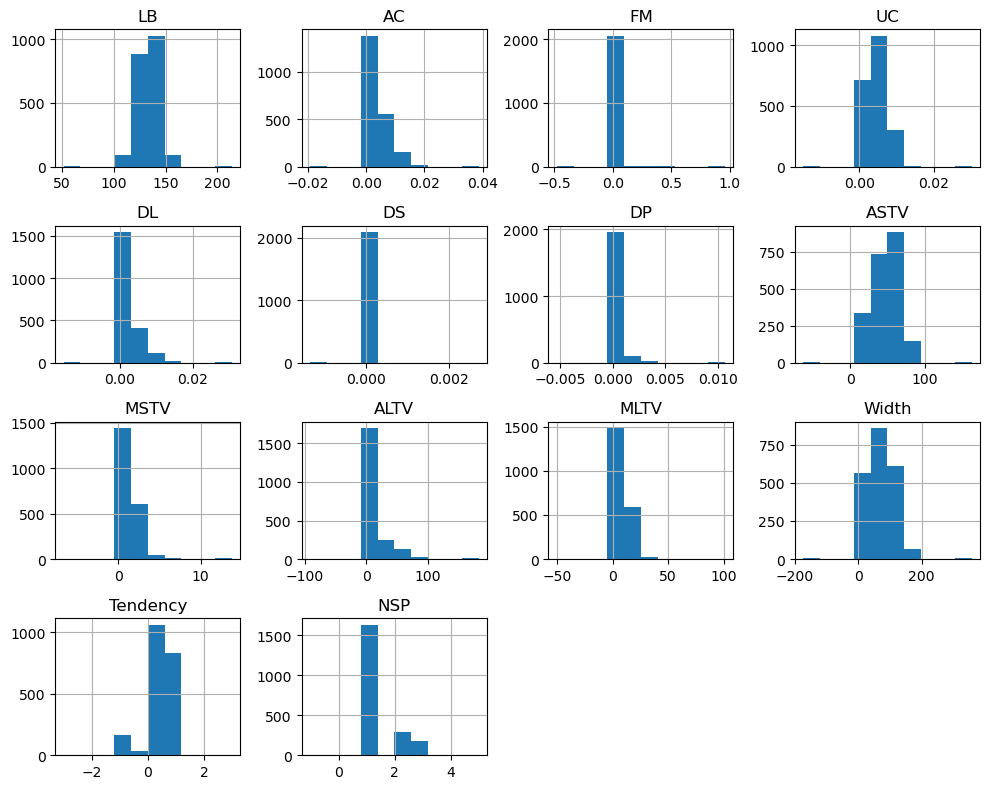

In [26]:
# data visualization
# Create histograms for each numerical variable
cardio.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

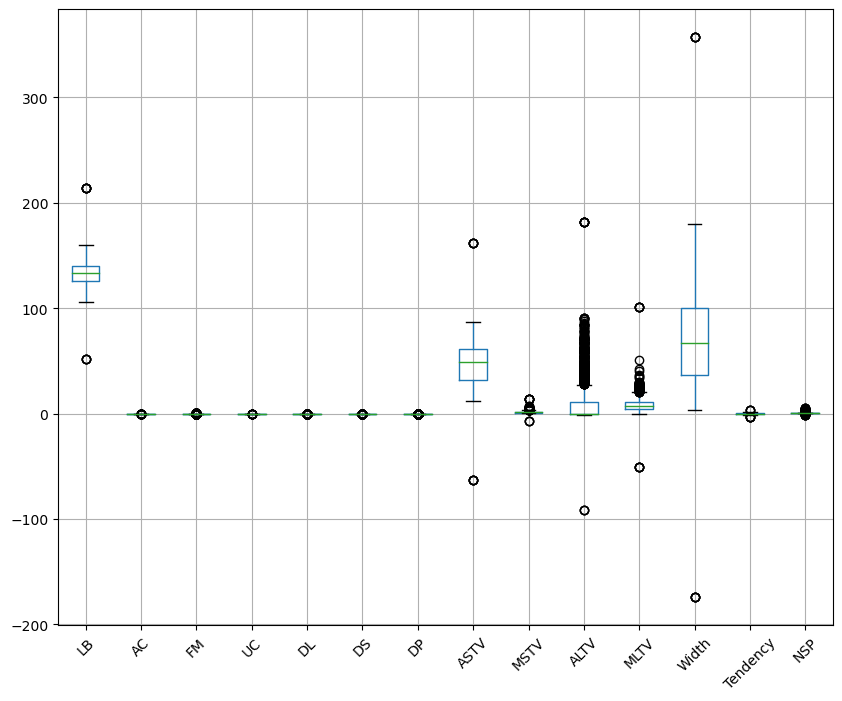

In [27]:
# Create boxplots for each numerical variable
cardio.boxplot(figsize=(10, 8))
plt.xticks(rotation=45)
plt.show()

In [28]:
# Use bar charts or pie charts to display the frequency of categories for categorical variables.
categorical_variables = cardio.select_dtypes(include=['object', 'category']).columns
categorical_variables



Index([], dtype='object')

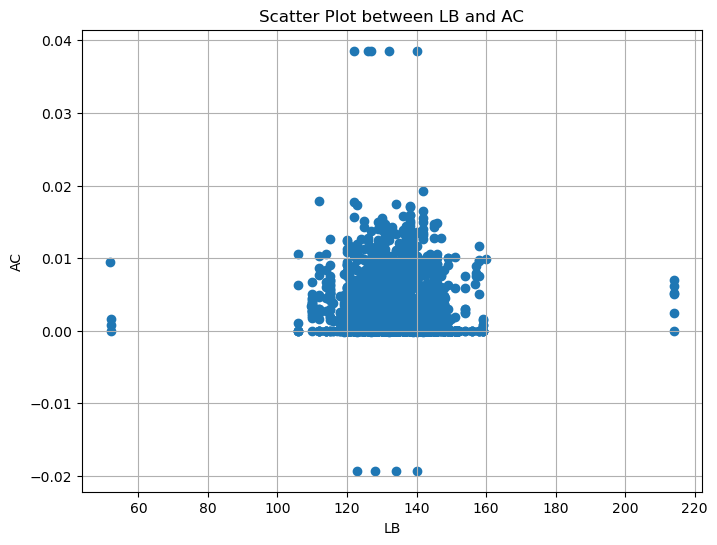

In [29]:
# Scatter plot between two numerical variables
plt.figure(figsize=(8, 6))
plt.scatter(cardio['LB'], cardio['AC'])
plt.title('Scatter Plot between LB and AC')
plt.xlabel('LB')
plt.ylabel('AC')
plt.grid(True)
plt.show()

In [30]:
# Calculate the correlation matrix
correlation_matrix = cardio.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [38]:
# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='DL', y='LB', data=cardio)
plt.title('Violin Plot of Numerical Variable across Categories')
plt.xlabel('DL')
plt.ylabel('LB')
plt.show()

In [39]:
# Pattern Recognition and Insights:
# Calculate correlation matrix
correlation_matrix = cardio.corr()

# Print correlation matrix
print(correlation_matrix)

                LB        AC        FM        UC        DL        DS  \
LB        1.000000 -0.063830  0.018777 -0.166570 -0.126959 -0.005438   
AC       -0.063830  1.000000  0.010152  0.070135 -0.095491 -0.033623   
FM        0.018777  0.010152  1.000000 -0.052979  0.009830  0.029901   
UC       -0.166570  0.070135 -0.052979  1.000000  0.191864 -0.006937   
DL       -0.126959 -0.095491  0.009830  0.191864  1.000000  0.058625   
DS       -0.005438 -0.033623  0.029901 -0.006937  0.058625  1.000000   
DP       -0.047724 -0.084590  0.121284  0.070658  0.145425  0.004285   
ASTV      0.242625 -0.230487 -0.032783 -0.181133 -0.070792  0.008452   
MSTV     -0.170473  0.126752  0.017481  0.190011  0.410155  0.016163   
ALTV      0.210728 -0.273890 -0.012276 -0.227817 -0.186571 -0.004398   
MLTV     -0.003457 -0.106529 -0.006237 -0.049460 -0.165750  0.034349   
Width    -0.118425  0.238436  0.097213  0.107397  0.410031  0.040832   
Tendency  0.236864  0.032481 -0.018339 -0.066610 -0.023569 -0.01

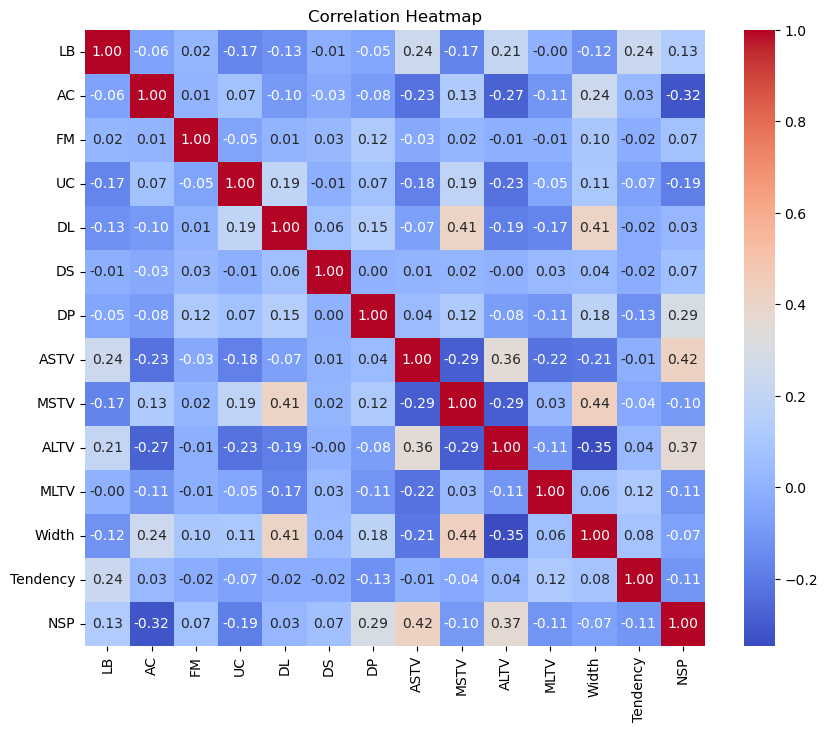

In [40]:
# Visualize correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

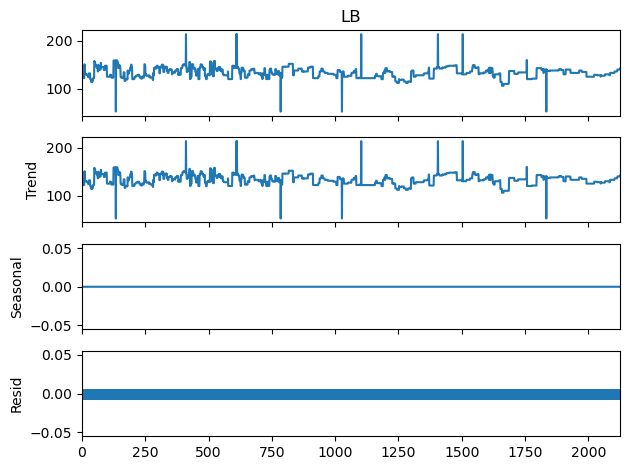

In [45]:
# Decompose time series into trend, seasonal, and residual components
result = seasonal_decompose(cardio['LB'], model='additive', period=1)

# Plot the decomposed components
result.plot()
plt.show()

In [ ]:
### Correlation Analysis:
- Positive correlations were observed between certain variables such as Baseline Fetal Heart Rate (LB) and Accelerations (AC), which may indicate a healthy fetal condition.
- Negative correlations were observed between variables like Uterine Contractions (UC) and Late Decelerations (DL), suggesting a potential relationship between contractions and fetal distress.
- No significant correlation was found between some variables, indicating independent behavior.

### Temporal Analysis:
- Time series plots revealed trends and patterns over time for numerical variables, providing insights into their temporal behavior.
- Seasonal decomposition helped identify underlying trends, seasonal patterns, and residual components in the temporal data.

### Category Frequency:
- Analysis of categorical variables such as Decelerations Late (DL), Decelerations Short (DS), and Decelerations Prolonged (DP) could provide insights into the occurrence and severity of decelerations during fetal monitoring.

### Distribution Analysis:
- Distribution plots, such as histograms or violin plots, could reveal the distribution of numerical variables and any potential outliers or skewness in the data.

### Summary Statistics:
- Calculating summary statistics for numerical variables, such as mean, median, standard deviation, and interquartile range, provided insights into the central tendency and dispersion of the data.

### Further Analysis:
- Further analysis could focus on understanding the clinical significance of observed patterns and correlations, exploring potential causal relationships between variables, and developing predictive models for fetal well-being based on the collected data.

In [ ]:
### Clinical Decision-Making:
- Highlight how the observed correlations and patterns could inform clinical decision-making in fetal monitoring.
- For example, if positive correlations were found between certain variables and indicators of fetal well-being, such as Accelerations (AC), these findings could support the decision to continue monitoring or intervene if necessary.
- Conversely, if negative correlations were observed between variables like Uterine Contractions (UC) and Decelerations Late (DL), this could prompt clinicians to closely monitor contractions to prevent fetal distress.

### Patient Care:
- Discuss how the insights gained from the analysis could improve patient care and outcomes.
- For instance, understanding the temporal patterns in fetal heart rate (FHR) could help clinicians anticipate and respond to changes in fetal well-being more effectively, potentially reducing the risk of adverse outcomes.

### Further Research:
- Outline potential areas for further research or analysis based on the identified patterns and correlations.
- For example, if certain variables showed unexpected behavior or if the analysis revealed gaps in understanding, further research could delve deeper into these areas to uncover underlying mechanisms or factors.

### Clinical Guidelines and Protocols:
- Suggest how the findings could influence the development or revision of clinical guidelines and protocols for fetal monitoring.
- For instance, if the analysis identified certain variables as strong predictors of adverse outcomes, this information could be integrated into clinical protocols to guide monitoring practices and interventions.

### Risk Assessment and Prediction Models:
- Discuss the potential for developing risk assessment tools or prediction models based on the identified correlations and patterns.
- For example, machine learning algorithms could be trained on the dataset to predict the likelihood of fetal distress or adverse outcomes based on specific combinations of variables.

### Collaboration with Domain Experts:
- Emphasize the importance of collaboration with domain experts, such as obstetricians, midwives, and fetal monitoring specialists, to validate findings and translate them into clinical practice effectively.